In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

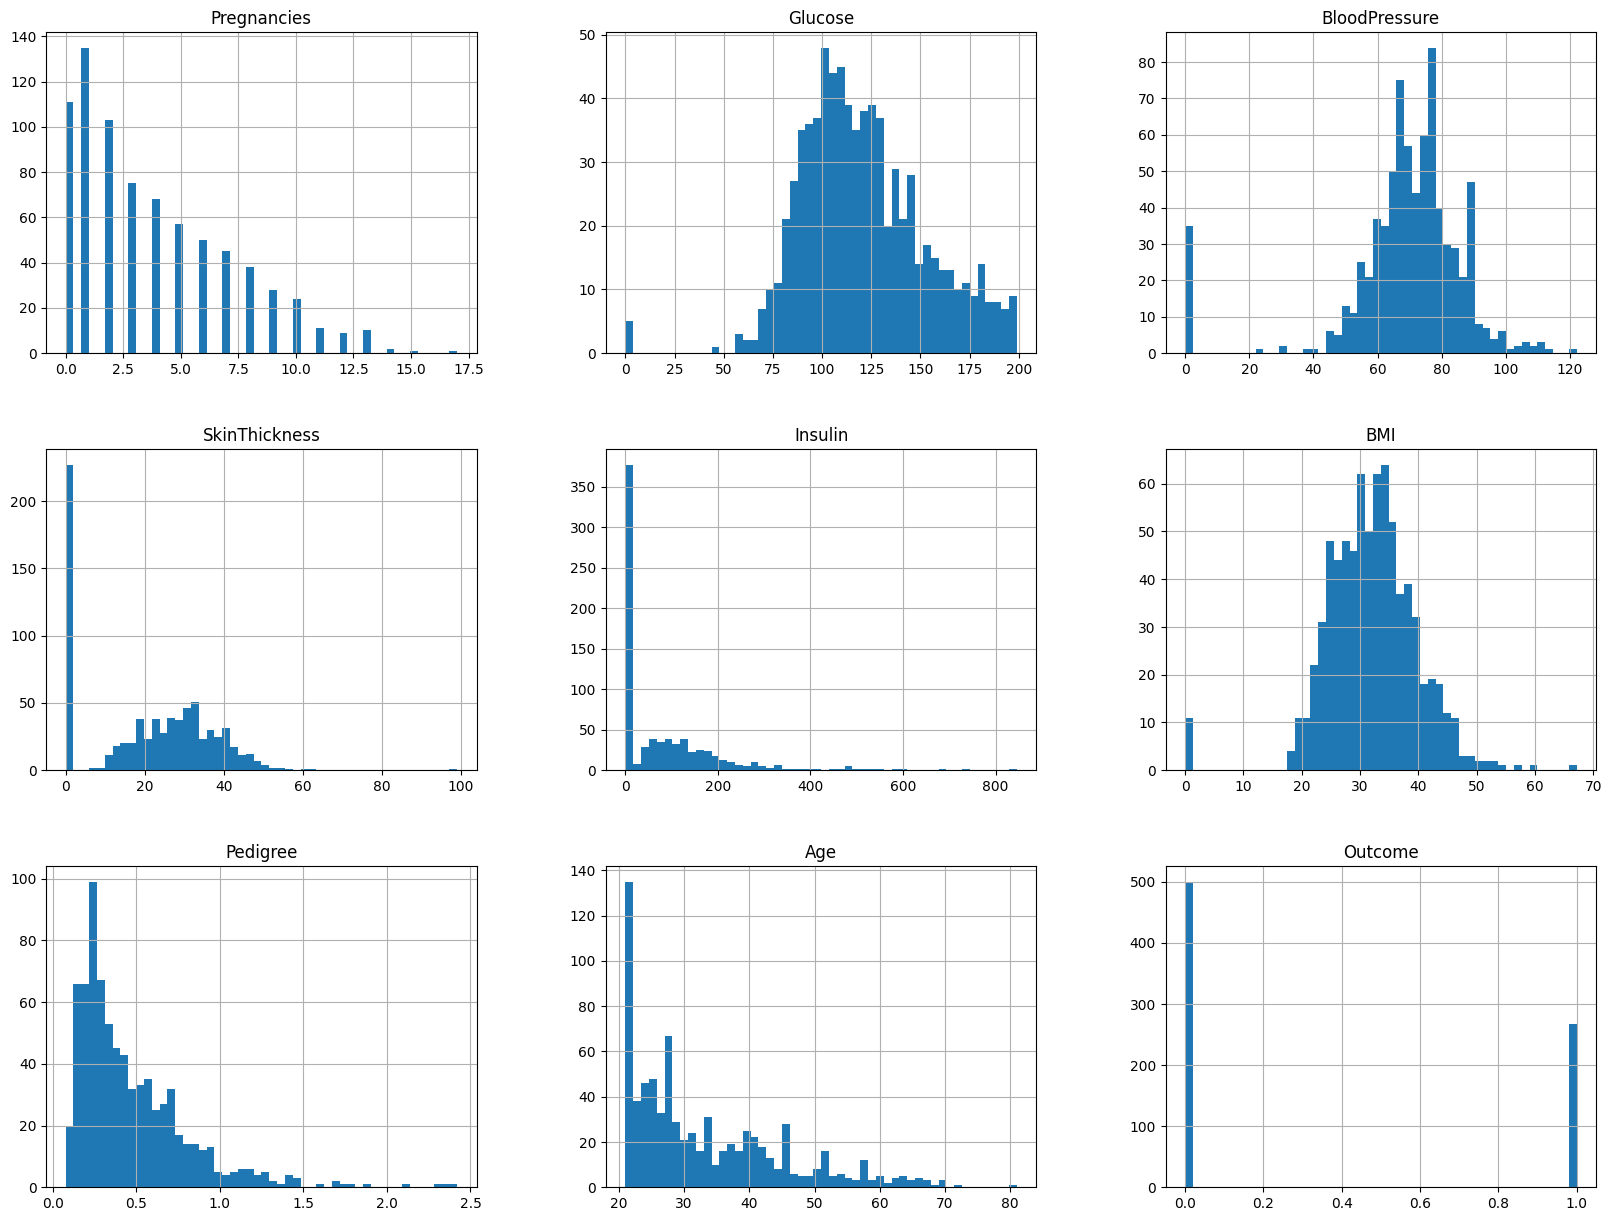

In [ ]:
df.hist(bins=50, figsize=(20, 15))

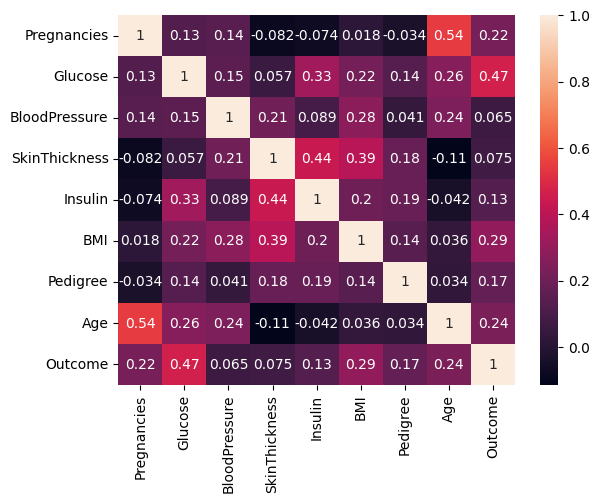

In [ ]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df_X = df[['Age', 'Glucose', 'BMI']]
y = df['Outcome']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_X)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1984)

In [ ]:
class LogisticRegression:

  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.weights = None
    self.bias = None

  def fit(self, x, y, epochs):
    self.weights = np.zeros(x.shape[1])
    self.bias = 0

    for i in range(epochs):
        x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
        pred = self._sigmoid(x_dot_weights)
        loss = self.compute_loss(y, pred)
        error_w, error_b = self.compute_gradients(x, y, pred)
        self.update_model_parameters(error_w, error_b)

        pred_to_class = [1 if p > 0.5 else 0 for p in pred]

  def _sigmoid(self, x):
    return np.array([self._sigmoid_function(value) for value in x])

  def _sigmoid_function(self, x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

  def compute_loss(self, y_true, y_pred):
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

  def compute_gradients(self, x, y_true, y_pred):
    # derivative of binary cross entropy
    difference =  y_pred - y_true
    gradient_b = np.mean(difference)
    gradients_w = np.matmul(x.transpose(), difference)
    gradients_w = np.array([np.mean(grad) for grad in gradients_w])
    return gradients_w, gradient_b

  def update_model_parameters(self, error_w, error_b):
    self.weights = self.weights - self.learning_rate * error_w
    self.bias = self.bias - self.learning_rate * error_b

  def predict(self, x):
    x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
    probabilities = self._sigmoid(x_dot_weights)
    return [1 if p > 0.5 else 0 for p in probabilities]

In [ ]:
from sklearn.metrics import classification_report
lr = LogisticRegression(learning_rate=1e-4)
lr.fit(X_train, y_train, epochs=150)
y_pred = lr.predict(X_test)
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.73      0.77        99
     Class 1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154

